# College Scorecard Data Revisited

In [10]:
# 1 - Import necessary libraries

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [12]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

all_collegescorecard_files=os.listdir('Assignment07\CollegeScorecard_Raw_Data')

college_data_files=[]
for file in all_collegescorecard_files:
    if file.startswith("MER"):
        college_data_files.append(os.path.join(file))

college_data_files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [29]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name


file_number=np.random.randint(22)
rand_file=college_data_files[file_number]
rand_file

'MERGED2012_13_PP.csv'

In [83]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df=pd.read_csv('Assignment07/CollegeScorecard_Raw_Data/' + rand_file,usecols=["INSTNM", "TUITIONFEE_IN"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7862 entries, 0 to 7861
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7862 non-null   object 
 1   TUITIONFEE_IN  4462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.0+ KB


In [34]:
# 5 - Find out how many observations have missing value.

df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    3400
dtype: int64

In [85]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward

df1=df.dropna() 
len(df1.index)



4462

In [41]:
# 7 - Find out how many observations have 0 tution.

len(df1.loc[df['TUITIONFEE_IN']==0])

6

In [89]:
# 8.1 - Drop those observations with 0 tuition
# Disaply the number of observations afterward

df1.drop(df1.loc[df['TUITIONFEE_IN']==0].index, inplace=True)
len(df1)


4456

In [93]:
# 8.2 - Reset the index so that it can be used to call observations correctly

df2=df1.reset_index(drop=True)              
len(df2)

4456

In [94]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations

df2["TUITIONFEE_IN"].mean()

13528.23698384201

In [113]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.

obs_num=np.random.randint(0,4456)
rand_obs=df2.loc[[obs_num]]
rand_obs

,INSTNM,TUITIONFEE_IN
574,Saint Johns River State College,2760.0


In [114]:
# 11 - Calculate the difference between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

diff=abs(df2["TUITIONFEE_IN"].mean() - rand_obs["TUITIONFEE_IN"])
diff

574    10768.236984
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means


### I ran the code for steps 10 and 11 a number of times.  Found the differences ranged from as low as 200 to as high as 14,000

In [149]:
# 13 - Randomly select 20 observations, display the tuition of these observation.

df3 = pd.DataFrame()

obs_num=np.random.randint(0,4456,20)

for i in obs_num:
    df3=df3.append(df2.loc[[i]])

df3

,INSTNM,TUITIONFEE_IN
4213,Pennsylvania State University-World Campus,12962.0
3272,Remington College-Cleveland Campus,15995.0
154,Barstow Community College,1104.0
3190,Platt College-Aurora,20186.0
2202,Ohio Valley College of Technology,11141.0
3419,Northern Career Institute,10875.0
1922,Syracuse University,39004.0
2776,Stephen F Austin State University,7928.0
3388,Sage College,12460.0
1677,Stockton University,12322.0


In [150]:
# 14 - Calculate and display the mean tuition of these 20 observations

df3["TUITIONFEE_IN"].mean()

12333.55

In [151]:
# 15 - Calculate the difference between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference

diff1=abs(df2["TUITIONFEE_IN"].mean() - df3["TUITIONFEE_IN"].mean())
diff1

1194.6869838420116

In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

###  I ran the code for steps 13 and 15 several times and got differences from as low of 1000 to a high of 2700.  The dfferences are confined to a much narrower range, suggesting that including more observations gives us a mean that is closer to the actual mean.

## Write a function that take two input parameters:

* x (number of observations)
* y (the name of the dataframe).

## The function will perform the following:

* Randomly select x observations from y
* Calculate the mean of these x observations
* Calculate the mean of all observations
* Calculate the difference between the two means
* Return the difference

In [152]:
# 17 - write function Code here

def difference(x,y):
    df4 = pd.DataFrame()
    obs_num=np.random.randint(0,4456,x)
    for i in obs_num:
        df4=df4.append(y.loc[[i]])
    avg_sub=df4["TUITIONFEE_IN"].mean()
    avg_all=y["TUITIONFEE_IN"].mean()
    diff1=abs(avg_sub-avg_all)
    
    return diff1
    



In [153]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function

difference(10,df2)

2662.8369838420113

In [158]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

sample_sizes_ay=np.arange(1,51,1)
sample_sizes=sample_sizes_ay.tolist()
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [159]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[]
for i in sample_sizes:
    diff2=difference(i,df2)
    means_diff.append(diff2)
means_diff
    

[11512.23698384201,
 2291.763016157989,
 5433.236983842011,
 7071.763016157989,
 1573.4369838420116,
 5787.929682824657,
 627.1915875865598,
 2355.513016157989,
 3905.570317175345,
 1769.2630161579891,
 1278.035743430717,
 3880.513016157989,
 696.0062146112414,
 1221.1655552705815,
 5742.829682824655,
 392.8619838420109,
 989.825219136128,
 4666.0407939357665,
 2106.7106680525376,
 3413.0630161579884,
 650.0011113960845,
 536.2824383874649,
 1797.806494418859,
 327.2630161579891,
 352.52301615798933,
 3164.4937853887586,
 1661.9482013431734,
 1416.2726981277247,
 2455.340432117873,
 2220.370317175344,
 334.3759193837959,
 768.2994838420109,
 2593.752135357163,
 2454.089925018481,
 913.2487304437036,
 154.06857171354386,
 2653.087340482314,
 1133.842246999906,
 905.6472402522668,
 137.48801615798948,
 1540.104479572623,
 2147.072539967512,
 62.446286167592916,
 749.353925248899,
 3443.474127269101,
 93.15432050581512,
 1640.3220902249905,
 2026.7994838420109,
 848.5385263620701,
 550.03

<ipython-input-160-ce2ee06d54d5>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


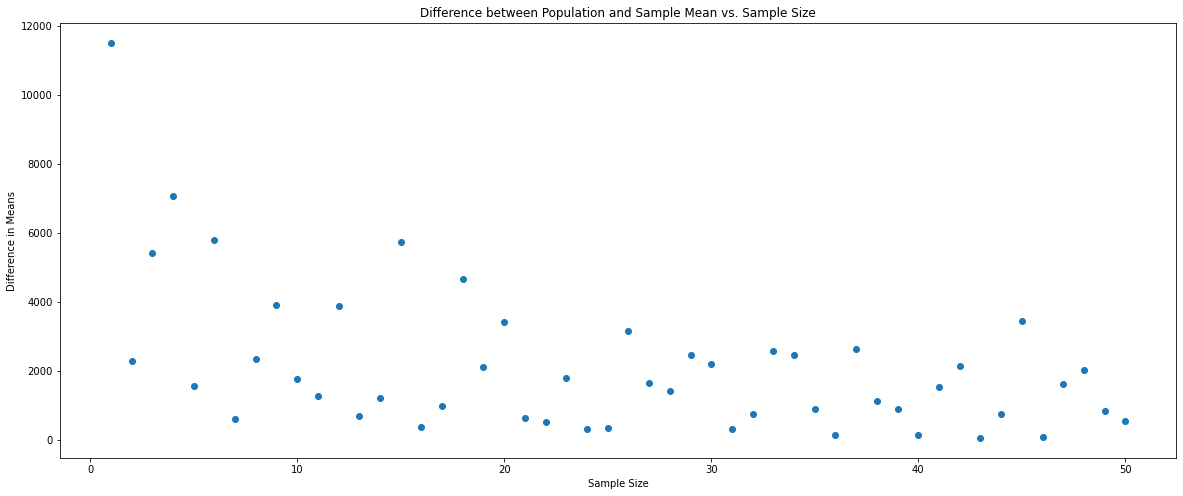

In [160]:
# 21 - Make a scatter plot with sample size on the x-axis and mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough

fig, ax = plt.subplots(figsize=(20,8))     

ax.scatter(sample_sizes, means_diff)
ax.set_title("Difference between Population and Sample Mean vs. Sample Size")
ax.set_xlabel("Sample Size")
ax.set_ylabel("Difference in Means")


fig.show()

<ipython-input-161-726d29f92aea>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


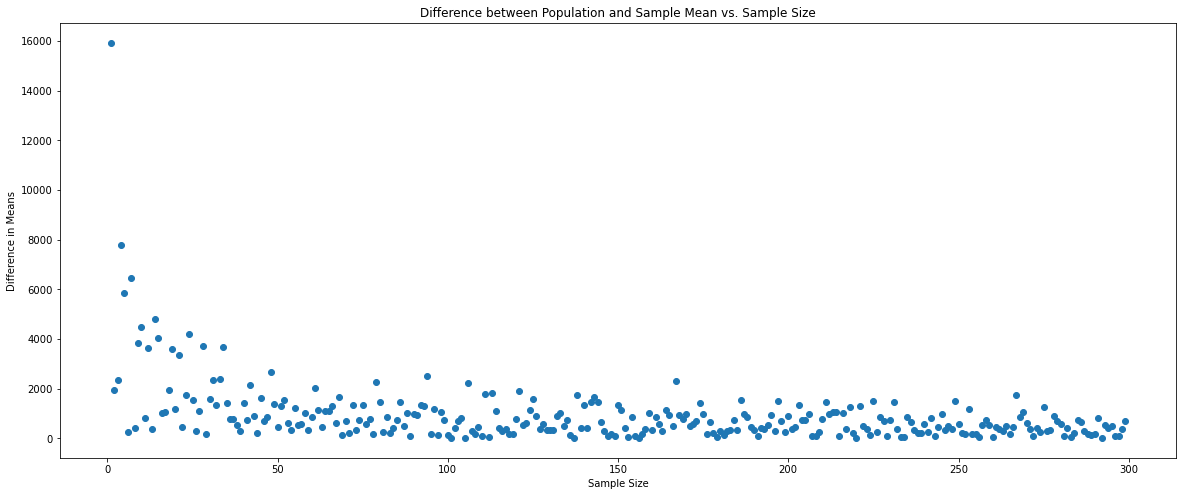

In [161]:
# 22.1 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300.
# and see how the plot looks.

# 19
sample_sizes_ay=np.arange(1,300,1)
sample_sizes=sample_sizes_ay.tolist()

# 20
means_diff=[]
for i in sample_sizes:
    diff2=difference(i,df2)
    means_diff.append(diff2)
means_diff

# 21

fig, ax = plt.subplots(figsize=(20,8))     

ax.scatter(sample_sizes, means_diff)
ax.set_title("Difference between Population and Sample Mean vs. Sample Size")
ax.set_xlabel("Sample Size")
ax.set_ylabel("Difference in Means")


fig.show()


<ipython-input-162-fd1cf835b064>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


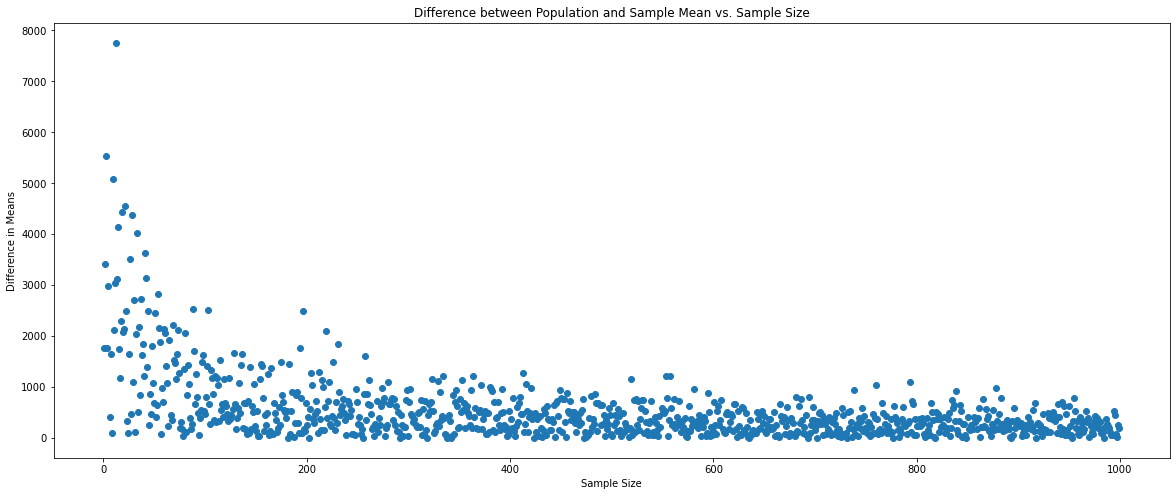

In [162]:
# 22.2 - repeat 18 to 21 by replacing 50 with a larger number. For example, 1000.
# and see how the plot looks.

# 19
sample_sizes_ay=np.arange(1,1000,1)
sample_sizes=sample_sizes_ay.tolist()

# 20
means_diff=[]
for i in sample_sizes:
    diff2=difference(i,df2)
    means_diff.append(diff2)
means_diff

# 21

fig, ax = plt.subplots(figsize=(20,8))     

ax.scatter(sample_sizes, means_diff)
ax.set_title("Difference between Population and Sample Mean vs. Sample Size")
ax.set_xlabel("Sample Size")
ax.set_ylabel("Difference in Means")


fig.show()

### The difference between the sample mean and the population mean do converge to 0 the larger the sample size is